In [139]:
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, Normalizer
from scipy.spatial.distance import squareform

In [145]:
class LinearRegression():
    
    def __init__(fit_intercept=True):
        self.fit_intercept = fit_intercept
        
    
    def fit(self, X, y):
        self.w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    
    def predict(self, X):
        return X.dot(self.w)

class StandardScaler():

    def __init__(self, with_mean=True, with_std=True):
        
        self._mean = 0.
        self._std = 0.
        
    def fit(self, X):
        self._mean = X.mean(axis = 0)
        self._std = X.std(axis = 0)
        re
        
    def transform(self, X):
        return (X - self._mean) / self._std
        
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

    def inverse_transform(self, X):
        
        if with_std is True:
            X *= self._std
        if with_mean is True:
            X += self._mean
            
        return X
    

class PolynomialFeatures():
    pass

In [141]:
lr = LinearRegression()

In [ ]:
lr.score()

In [ ]:
def simple_plot(x, y, y_regression, test_idx=None):
    plt.scatter(x,y, s=80, c ='r', edgecolors='k', linewidths=0.3);
    plt.plot(x,y_regression);
    if test_idx is not None:
        plt.scatter(x[test_idx], y[test_idx], s=80, c ='b', edgecolors='k', linewidths=0.3);
    plt.title('MSE = {}'.format(mean_squared_error(y, y_regression)));
    
def zscore(x):
    return (x - x.mean())/x.std(), x.mean(), x.std()

def generate_poly_features(x, order):
    return np.concatenate([x**i for i in range(order+1)], axis=1)

def lr_poly_features(x, y, order=1):
    '''
    order - highest degree to generate as feature
            ex. order = 3, gives 1, x, x**2, x**3
    '''
    
    x, mean, std = zscore(x)
    X = generate_poly_features(x, order=order)
    y_regression, w = simple_linear_regression(X, y)
    
    return y_regression, w

# define simple linear regression
def simple_linear_regression(X,y):
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) 
    return X.dot(w), w

In [148]:
scale = StandardScaler()

In [149]:
scale.fit(X)

In [47]:
from sklearn.datasets import load_digits
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
data= load_digits(10)

In [130]:
data['images'].shape

(1797, 8, 8)

In [131]:
X = data['images']
y = data['target']
X = X.reshape((1797, 64))

In [133]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [122]:
lr = LogisticRegression(penalty='l2', solver='newton-cg')

In [134]:
x_train = X[:1200]
y_train = y[:1200]

x_test = X[1200:]
y_test = y[1200:]

In [135]:
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [136]:
y_pred = lr.predict_proba(x_test)[:, 1]

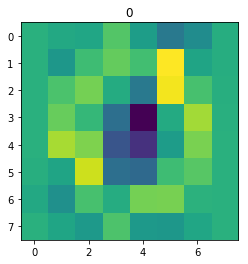

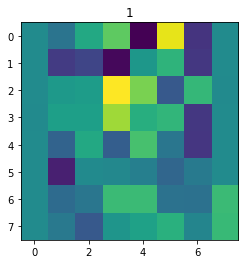

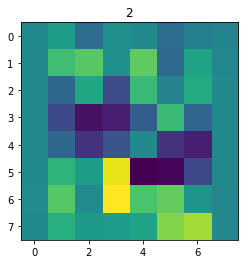

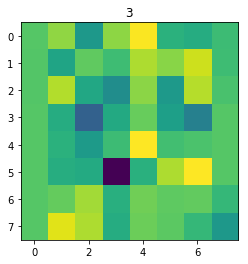

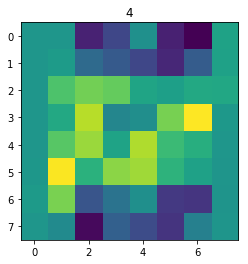

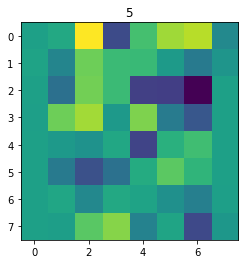

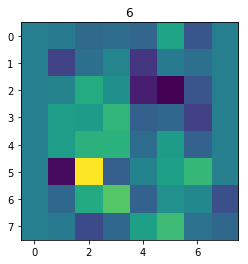

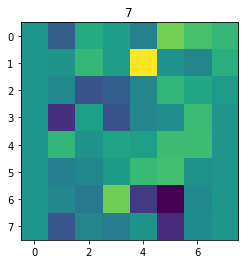

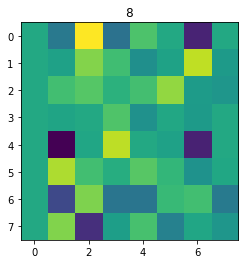

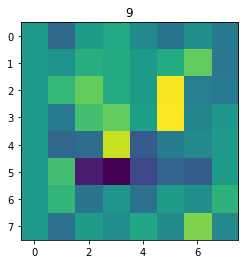

In [138]:
for i in range(10):
    plt.figure()
    plt.imshow(lr.coef_[i].reshape(8,8))
    plt.title(i)

In [105]:
lr.coef_

array([[  0.00000000e+00,  -1.08698248e-02,  -1.36952933e-02,
          6.00002847e-02,  -3.86899854e-02,  -3.99445303e-02,
         -2.39511359e-02,  -1.04553959e-03,  -2.07329217e-04,
         -3.43615251e-02,   7.78664378e-02,   3.26845375e-02,
          7.04445745e-02,   2.22600173e-01,  -2.11287368e-02,
         -1.28464185e-03,  -2.07939975e-04,   9.09006291e-02,
          1.97770665e-01,  -4.36800385e-02,  -1.37190567e-01,
          2.02031441e-01,   2.26542806e-02,  -3.91591542e-03,
         -4.65110808e-08,   1.20556290e-01,   1.32011109e-01,
         -8.60472653e-02,  -3.62327071e-01,   1.35111427e-02,
          9.45920066e-02,  -2.83697932e-03,   0.00000000e+00,
          6.37078395e-02,   1.22209775e-01,  -1.70170292e-01,
         -3.74210039e-01,  -1.31011874e-01,   8.43036412e-02,
          0.00000000e+00,  -5.78141709e-03,  -1.09767137e-01,
          8.44375967e-02,  -1.54918442e-01,  -1.79158650e-01,
          4.69084931e-02,   6.04222575e-02,   0.00000000e+00,
        

In [10]:
X = np.random.rand(30,2)

In [14]:
a = np.random.rand(10,3)

In [21]:
((a - a.mean(axis=0)) / a.std(axis=0)).sum(axis=0)

array([  1.11022302e-15,   1.05471187e-15,   1.88737914e-15])

In [2]:
lr = LinearRegression()

In [7]:
pf = PolynomialFeatures()

In [5]:
scale = StandardScaler()

In [12]:
scale.transform()

AttributeError: 'StandardScaler' object has no attribute 'scale_'

In [6]:
normalizer = Normalizer()

In [11]:
pf.include_bias

True